In [24]:
%config Completer.use_jedi = False

In [25]:
%matplotlib inline
!pip show tensorflow

Name: tensorflow
Version: 2.8.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\vinod\miniconda3\envs\mini\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [26]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [27]:
def load_data(battery):
  mat = loadmat(battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]

In [28]:
dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
print(dataset.head())

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-04-02 15:25:41  1.856487          4.191492   
1      1                   24 2008-04-02 15:25:41  1.856487          4.190749   
2      1                   24 2008-04-02 15:25:41  1.856487          3.974871   
3      1                   24 2008-04-02 15:25:41  1.856487          3.951717   
4      1                   24 2008-04-02 15:25:41  1.856487          3.934352   

   current_measured  temperature_measured  current_load  voltage_load    time  
0         -0.004902             24.330034       -0.0006         0.000   0.000  
1         -0.001478             24.325993       -0.0006         4.206  16.781  
2         -2.012528             24.389085       -1.9982         3.062  35.703  
3         -2.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle                 50285 non-null  int64         
 1   ambient_temperature   50285 non-null  int8          
 2   datetime              50285 non-null  datetime64[ns]
 3   capacity              50285 non-null  float64       
 4   voltage_measured      50285 non-null  float64       
 5   current_measured      50285 non-null  float64       
 6   temperature_measured  50285 non-null  float64       
 7   current_load          50285 non-null  float64       
 8   voltage_load          50285 non-null  float64       
 9   time                  50285 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), int8(1)
memory usage: 3.5 MB


In [30]:
capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cycle                168 non-null    int64         
 1   ambient_temperature  168 non-null    int8          
 2   datetime             168 non-null    datetime64[ns]
 3   capacity             168 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), int8(1)
memory usage: 4.2 KB


In [31]:
capacity.head(50)

,cycle,ambient_temperature,datetime,capacity
0,1,24,2008-04-02 15:25:41,1.856487
1,2,24,2008-04-02 19:43:48,1.846327
2,3,24,2008-04-03 00:01:06,1.835349
3,4,24,2008-04-03 04:16:37,1.835263
4,5,24,2008-04-03 08:33:25,1.834646
5,6,24,2008-04-03 12:55:10,1.835662
6,7,24,2008-04-03 17:17:16,1.835146
7,8,24,2008-04-03 21:28:14,1.825757
8,9,24,2008-04-04 01:38:15,1.824774
9,10,24,2008-04-04 05:48:08,1.824613


In [32]:
dataset[dataset["cycle"] == 1]

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...
192,1,24,2008-04-02 15:25:41,1.856487,3.258705,-0.001513,35.296711,-0.0006,0.000,3608.594
193,1,24,2008-04-02 15:25:41,1.856487,3.264121,-0.001532,35.021738,-0.0006,0.000,3628.953
194,1,24,2008-04-02 15:25:41,1.856487,3.269030,-0.000406,34.754871,-0.0006,0.000,3649.375
195,1,24,2008-04-02 15:25:41,1.856487,3.273207,-0.000388,34.490078,-0.0006,0.000,3669.875


In [33]:
dataset[dataset["cycle"] == 10]

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
1747,10,24,2008-04-04 05:48:08,1.824613,4.189223,-0.005976,24.572058,-0.0006,0.000,0.000
1748,10,24,2008-04-04 05:48:08,1.824613,4.188692,-0.003553,24.561560,-0.0008,4.204,16.672
1749,10,24,2008-04-04 05:48:08,1.824613,3.986908,-2.013246,24.619612,-1.9982,3.060,35.563
1750,10,24,2008-04-04 05:48:08,1.824613,3.965630,-2.012117,24.768375,-1.9982,3.029,53.735
1751,10,24,2008-04-04 05:48:08,1.824613,3.949667,-2.012680,24.945107,-1.9982,3.001,71.797
...,...,...,...,...,...,...,...,...,...,...
1932,10,24,2008-04-04 05:48:08,1.824613,3.249617,0.003019,36.158845,-0.0006,0.000,3470.047
1933,10,24,2008-04-04 05:48:08,1.824613,3.261502,-0.000048,35.855944,-0.0006,0.000,3490.454
1934,10,24,2008-04-04 05:48:08,1.824613,3.271529,-0.001184,35.575691,-0.0006,0.000,3510.766
1935,10,24,2008-04-04 05:48:08,1.824613,3.280684,-0.001889,35.304799,-0.0006,0.000,3531.032


In [34]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Cycles')

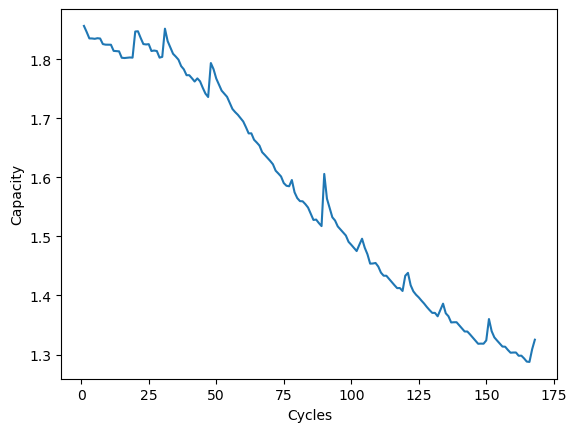

In [35]:
plt.plot(pd.pivot_table(dataset, values = "capacity", index = "cycle", 
                        aggfunc = np.mean))
plt.ylabel('Capacity')
plt.xlabel('Cycles')

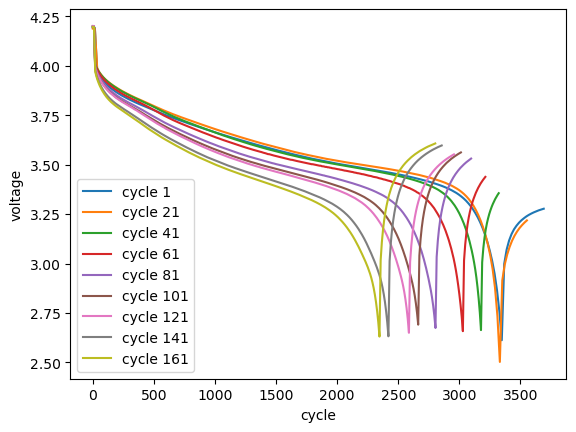

In [47]:
for i in range(0,168, 20):
    plt.plot(dataset[dataset["cycle"] == i+1]["time"], 
             dataset[dataset["cycle"] == i+1]["voltage_measured"],
             label = "{} {}".format("cycle", i+1))
    plt.legend()
    plt.xlabel("cycle")
    plt.ylabel("voltage")

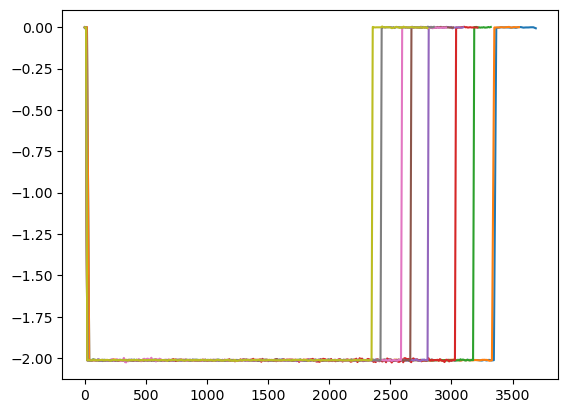

In [14]:
for i in range(0,168, 20):
    plt.plot(dataset[dataset["cycle"] == i+1]["time"], dataset[dataset["cycle"] == i+1]["current_measured"])

In [15]:
def load_data_charge(battery):
  mat = loadmat(battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  #capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'charge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      #capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_charge'][0][j]
        voltage_load = data[0][0]['Voltage_charge'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      #capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_charge', 'voltage_charge', 'time'])

In [16]:
chargeData = load_data_charge("B0005")

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 13, 8, 17), 3.873017221300996, -0.001200660698297908, 24.65535783391511, 0.0, 0.003, 0.0]


In [17]:
chargeData

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,time
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125
...,...,...,...,...,...,...,...,...,...
541168,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,0.003,0.000
541169,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.000,0.003,2.547
541170,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.000,5.002,5.500
541171,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.002,5.002,8.312


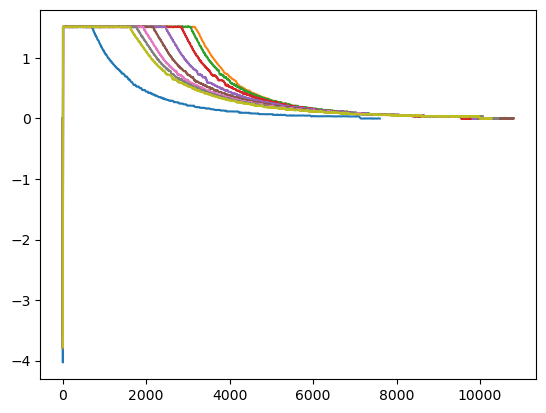

In [18]:
for i in range(0,168, 20):
    plt.plot(chargeData[chargeData["cycle"] == i+1]["time"], chargeData[chargeData["cycle"] == i+1]["current_measured"])

In [19]:
chargeData[chargeData["cycle"] == 1]

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,time
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125
...,...,...,...,...,...,...,...,...,...
784,1,24,2008-04-02 13:08:17,4.190822,-0.003391,24.539397,0.000,0.003,7525.782
785,1,24,2008-04-02 13:08:17,4.191299,-0.000942,24.532498,0.000,0.003,7543.797
786,1,24,2008-04-02 13:08:17,4.191388,-0.000351,24.518673,0.000,0.003,7561.750
787,1,24,2008-04-02 13:08:17,4.191453,-0.001856,24.514363,0.000,0.003,7579.813


In [20]:
def load_data_charge(battery):
  mat = loadmat(battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  #capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'charge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      #capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_charge'][0][j]
        voltage_load = data[0][0]['Voltage_charge'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      #capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_charge', 'voltage_charge', 'time'])

In [21]:
impedData = load_data_charge("B0005")

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 13, 8, 17), 3.873017221300996, -0.001200660698297908, 24.65535783391511, 0.0, 0.003, 0.0]


In [22]:
impedData

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,current_charge,voltage_charge,time
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,0.003,0.000
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,-4.036,1.570,2.532
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,1.500,4.726,5.500
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,1.500,4.742,8.344
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,1.500,4.753,11.125
...,...,...,...,...,...,...,...,...,...
541168,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,0.003,0.000
541169,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,0.000,0.003,2.547
541170,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,0.000,5.002,5.500
541171,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,-0.002,5.002,8.312


In [23]:
dataset.to_csv(r'D:/Malathi/NIT/discharge_csv.csv')